# Clean and analyze employee exit surveys

In this project we will analyze two datasets of exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education(TAFE) institute in Queensland, Australia.
We want to answer two questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we will work with from the dete_survey.csv:
* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

## Reading the datasets:

We will start reading the two datasets and assigning to the variables dete_survey and tafe_survey:

In [1]:
import numpy as np
import pandas as pd

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

We will explore the both datasets using the methods DataFrame.info() and DataFrame.head() in both data sets.

In [3]:
pd.options.display.max_columns = 150 # to avoid truncated output 
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

We can also use seaborn to create a plot to view the distribution of the null values in the datasets. The function below uses seaborn.heatmap() to represent non-null values as light squares and null values as dark squares:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

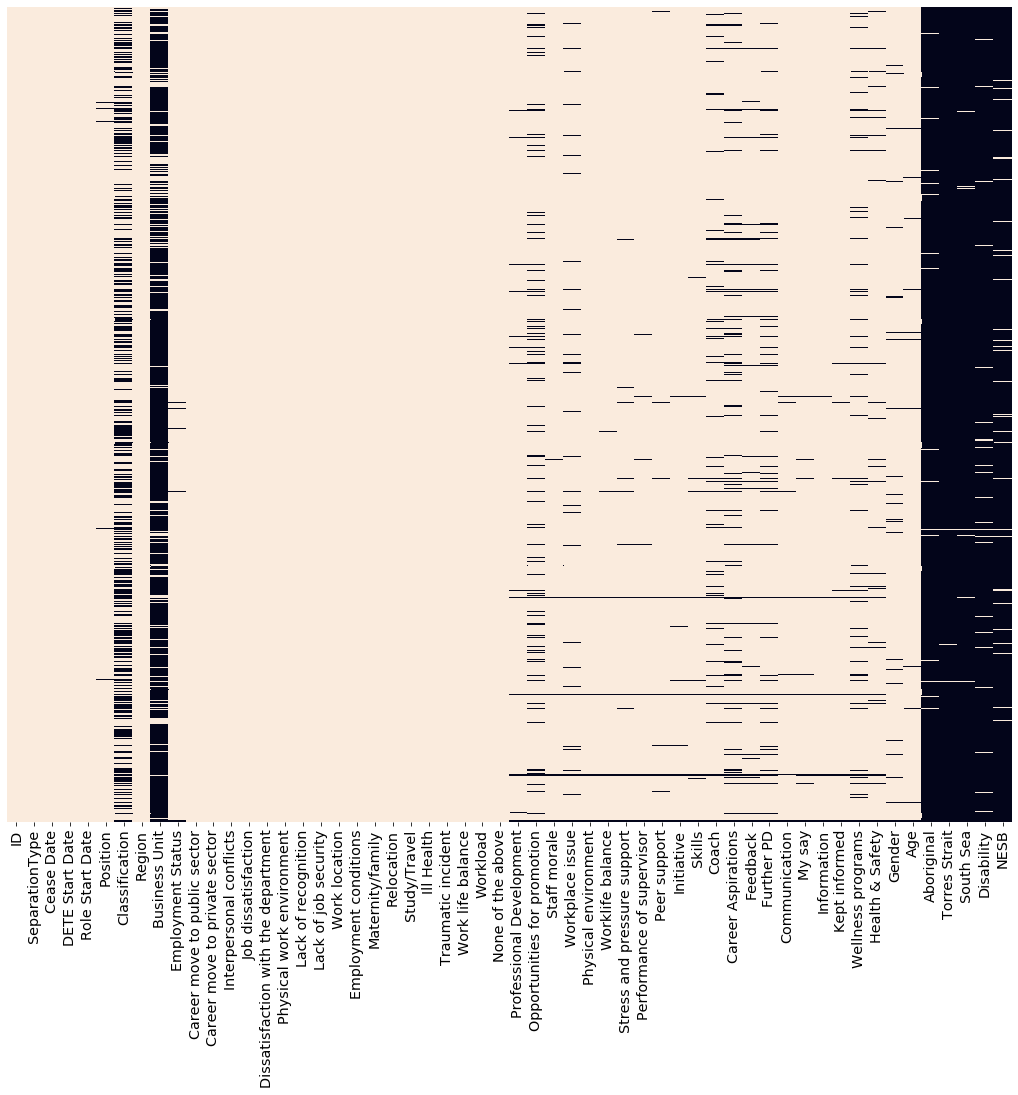

In [8]:
plot_null_matrix(dete_survey)

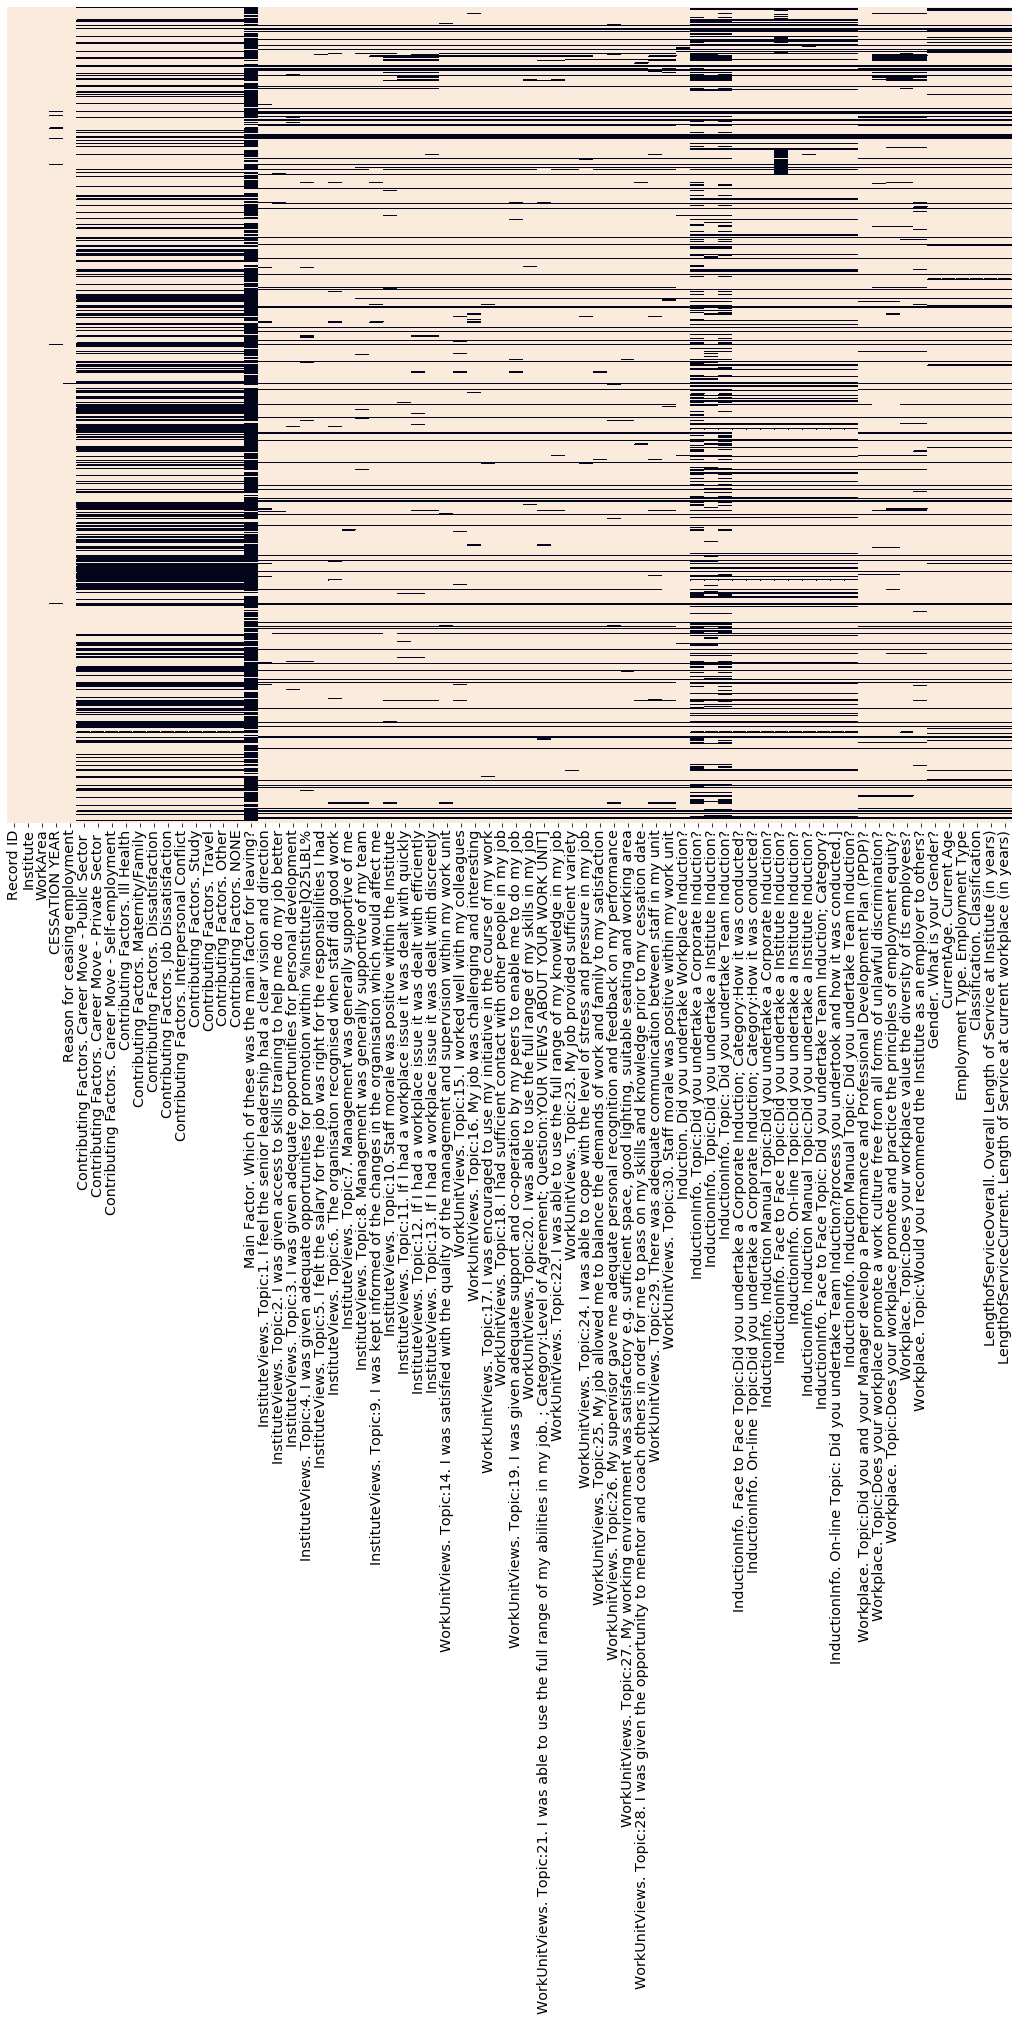

In [9]:
plot_null_matrix(tafe_survey)

We can see in the case of dete_survey that the null values are mostly in the last 5 columns and in "Business Unit" column.
In the case of tafe_survey we have very long names of columns and a column "Main Factor. Which of these was the main factor for leaving?" with a long number of null values.

We can also make the following observations:
* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Identify missing values and drop unnecessary columns

To start we will handle the first two issues. We'll use the function pd.read_csv() again to specify values that should be represented as NaN.

In [10]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

Then let´s drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with:

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [12]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [14]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Clean column names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different.
Because we eventually want to combine then, we'll have to standardize the column names.

We will use the following criteria to update the column names of the dete_survey_updated dataframe:
* Make all the capitalization lowercase.
* Remove any trailing whitespace from the end of the strings.
* Replace spaces with undersocres("_")

In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace("\s+","_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In the case of the tafe_survey_updated dataframe we will update the name of the columns below:
* 'Record ID': 'id'
* 'CESSATION YEAR': 'cease_date'
* 'Reason for ceasing employment': 'separationtype'
* 'Gender. What is your Gender?': 'gender'
* 'CurrentAge. Current Age': 'age'
* 'Employment Type. Employment Type': 'employment_status'
* 'Classification. Classification': 'position'
* 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
* 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [17]:
new_names = {'Record ID': 'id',
             'CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment': 'separationtype',
             'Gender. What is your Gender?': 'gender',
             'CurrentAge. Current Age': 'age',
             'Employment Type. Employment Type': 'employment_status',
             'Classification. Classification': 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(columns = new_names, inplace = True)

In [18]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filter the data

Previously we renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need to answer the following question:
* "Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?".

We'll look the unique values in separationtype columns:

In [19]:
dete_survey_updated["separationtype"].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated["separationtype"].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

As we can see each column "separationype" contains a couple of different separation types.  For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string "Resignation".

Then we'll create two news dataframes with the rows that have the word "Resignation":

In [21]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")].copy()
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [22]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation", na = False)].copy()
#We dropped the NaN value of the dataframe using na=False
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Verify the data

Now, before we start cleaning and manipulating the rest of our data, we'll verify that the data doesn't contain any major inconsistencies.

We'll focus on verifying that the years in the cease_date and dete_start_date columns make sense:
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20's, it's also unlikely that the dete_start_date was before the year 1940.

We we'll check the years in each dataframe for logical inconsistencies:

In [23]:
dete_resignations["cease_date"].value_counts(dropna = False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

We need to extract only the years of that column, so we'll use regular expressions and transform the column to float type.

In [24]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r"(20\d{2})", expand = True)
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["cease_date"].head()

3     2012.0
5     2012.0
8     2012.0
9     2012.0
11    2012.0
Name: cease_date, dtype: float64

In [25]:
dete_resignations["cease_date"].value_counts(dropna = False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [26]:
dete_resignations["dete_start_date"].value_counts(dropna = False).sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: dete_start_date, dtype: int64

We use value_counts() to view the unique values in the cease_date column of tate_resignations:

In [27]:
tafe_resignations["cease_date"].value_counts(dropna = False).sort_index(ascending = False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64

## Creating a new column

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.
We'll create a new column named "institute_service" in  the dataset dete_resignations subtracting the dete_start_date from the cease_date:

In [28]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts(dropna = False).sort_index(ascending = False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
NaN     38
Name: institute_service, dtype: int64

We'll check how many NaN values has the dataset:

In [29]:
dete_resignations["institute_service"].isnull().sum()/dete_resignations["institute_service"].shape[0] * 100

12.218649517684888

We have 12% of NaNs in the data set.

## Identify dissatisfied Employees

Before, we created a new institute_service column that we'll use to analyze survey respondents according to their lenght of employment. Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. tafe_survey_updated:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction

2. detesurvey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

We'll use the Series.value_counts() method to view the values in two columns of tafe_resignatios:

In [30]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We'll update the values in both so that each contains only True, False or NaN values:

In [32]:
def update_vals(element):
    if element == "-":
        return False
    elif pd.isnull(element):
        return np.nan
    else:
        return True

In [33]:
dissatisfaction_factors_tafe = tafe_resignations[["Contributing Factors. Dissatisfaction",
                                                  "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)

In [34]:
tafe_resignations["dissatisfied"] = dissatisfaction_factors_tafe.any(axis = 1, skipna = False)
tafe_resignations["dissatisfied"].value_counts(dropna = False)

False    241
True      91
True       8
Name: dissatisfied, dtype: int64

**Note**: The second "True" corresponds to the NaN values, it seems a bug in the pandas method value_counts. We corroborate that in the following cell.

In [35]:
print("Number of NaN values: {}".format(tafe_resignations["dissatisfied"].isnull().sum()))
print("Index of value_counts: {}".format(tafe_resignations["dissatisfied"].value_counts(dropna = False).index))

Number of NaN values: 8
Index of value_counts: Index([False, True, nan], dtype='object')


In [36]:
tafe_resignations_up = tafe_resignations.copy()

In [37]:
dissatisfaction_factors_dete = dete_resignations[["job_dissatisfaction",
                  "dissatisfaction_with_the_department",
                  "physical_work_environment",
                  "lack_of_recognition",
                  "lack_of_job_security",
                  "work_location",
                  "employment_conditions",
                  "work_life_balance",
                  "workload"]]

In [38]:
dete_resignations["dissatisfied"] = dissatisfaction_factors_dete.any(axis = 1, skipna = False)

In [39]:
dete_resignations_up = dete_resignations.copy()

In [40]:
dete_resignations_up["dissatisfied"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

Above we've accomplished the following:
* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now we will combine both datasets.

First we'll add a "institute" column to each dataframe that will allow us to easily distinguish between the two, with the value "DETE" and "TAFE" respectively.

In [41]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

Next we'll combine both dataframes:

In [42]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

We still have some columns left in the dataframe that we don't need to complete our analysis. So we'll use Dataframe.dropna() method to drop any columns with less than 500 non null values:

In [44]:
combined_updated = combined.dropna(axis = 1, thresh = 500).copy()
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

## Cleaning the service column

Now we want to clean up the institute_service column. We'll start to inspect the column:

In [45]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our analysis on __[this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage)__, which makes the argument that undersanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

We'll extract the years of the column and convert to float type:

In [46]:
combined_updated["institute_service"]

0        7
1       18
2        3
3       15
4        3
      ... 
646    5-6
647    1-2
648    NaN
649    5-6
650    3-4
Name: institute_service, Length: 651, dtype: object

In [47]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)", expand = False)

In [48]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype(float)

In [49]:
combined_updated["institute_service"]

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

Next, we'll map each value to one of the career stage definitions above:

In [50]:
def years(number):
    if pd.isnull(number):
        return np.nan
    elif number < 3:
        return "New"
    elif 3 <= number < 7:
        return "Experienced"
    elif 7 <= number < 11:
        return "Established"
    elif number >= 11:
        return "Veteran"

In [51]:
combined_updated["service_cat"] = combined_updated["institute_service"].apply(years)

We'll check the results:

In [52]:
combined_updated["service_cat"].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Performing an Initial Analysis

We will check the number of True and False in the dissatisfied column, including the missing values.

In [53]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

We'll replace the missing values in the dissatisfied column with False values, because is the most frequently value

In [54]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

In [55]:
combined_updated["dissatisfied"].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

Finally we'll analyze the percentage of employees who resigned due to dissatisfaction in each category and plot the results.

In [56]:
dissatisfaction_cat = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dissatisfaction_cat

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


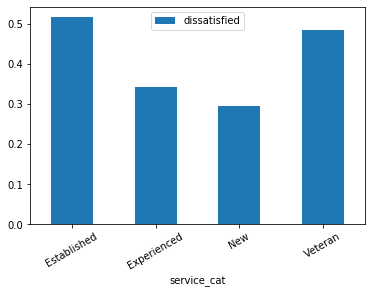

In [57]:
%matplotlib inline
dissatisfaction_cat.plot(kind='bar', rot=30)